In [21]:
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
formants = pd.read_csv('pb.csv') #Load in dataset

In [4]:
formants.head() #View first five records

,Type,Sex,Speaker,Vowel,IPA,F0,F1,F2,F3
0,m,m,1,iy,i,160,240,2280,2850
1,m,m,1,iy,i,186,280,2400,2790
2,m,m,1,ih,\ic,203,390,2030,2640
3,m,m,1,ih,\ic,192,310,1980,2550
4,m,m,1,eh,\ef,161,490,1870,2420


In [7]:
drop_rcolored = formants[formants['IPA'] != '\er\hr'] #Create new table without r-colored vowels

In [8]:
drop_rcolored_pivot = pd.pivot_table(drop_rcolored, values = 'F3', index = ['Sex','Speaker'], aggfunc = np.mean) #Pivot table to sort by Sex

In [13]:
drop_rcolored_pivot['F1'] = drop_rcolored_pivot['F3'].apply(lambda x: x / 5)
drop_rcolored_pivot['F2'] = drop_rcolored_pivot['F1'].apply(lambda x: x * 3) #Calculate average F1 and F2

In [15]:
drop_rcolored_pivot['Vocal Tract'] = drop_rcolored_pivot['F1'].apply(lambda x: 17.7 * (500/x)) #Calculate Vocal Tract Length

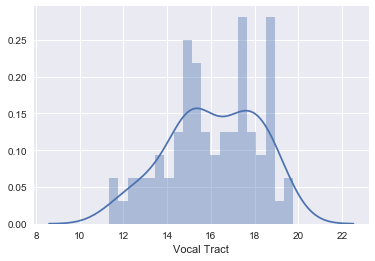

In [68]:
sns.distplot(drop_rcolored_pivot['Vocal Tract'],bins=20) #Pretty graph, but doesn't show Sex distribution

In [44]:
drop_rcolored_pivot.head()

F3          F1           F2  Vocal Tract
Sex Speaker                                                   
f   34       3013.333333  602.666667  1808.000000    14.684735
    35       2967.777778  593.555556  1780.666667    14.910146
    36       2811.666667  562.333333  1687.000000    15.737996
    37       2821.111111  564.222222  1692.666667    15.685309
    38       2937.222222  587.444444  1762.333333    15.065254

In [56]:
final_table = drop_rcolored_pivot.reset_index() #Reset index to retrieve Sex Classification

In [57]:
final_table.head()

,Sex,Speaker,F3,F1,F2,Vocal Tract
0,f,34,3013.333333,602.666667,1808.000000,14.684735
1,f,35,2967.777778,593.555556,1780.666667,14.910146
2,f,36,2811.666667,562.333333,1687.000000,15.737996
3,f,37,2821.111111,564.222222,1692.666667,15.685309
4,f,38,2937.222222,587.444444,1762.333333,15.065254


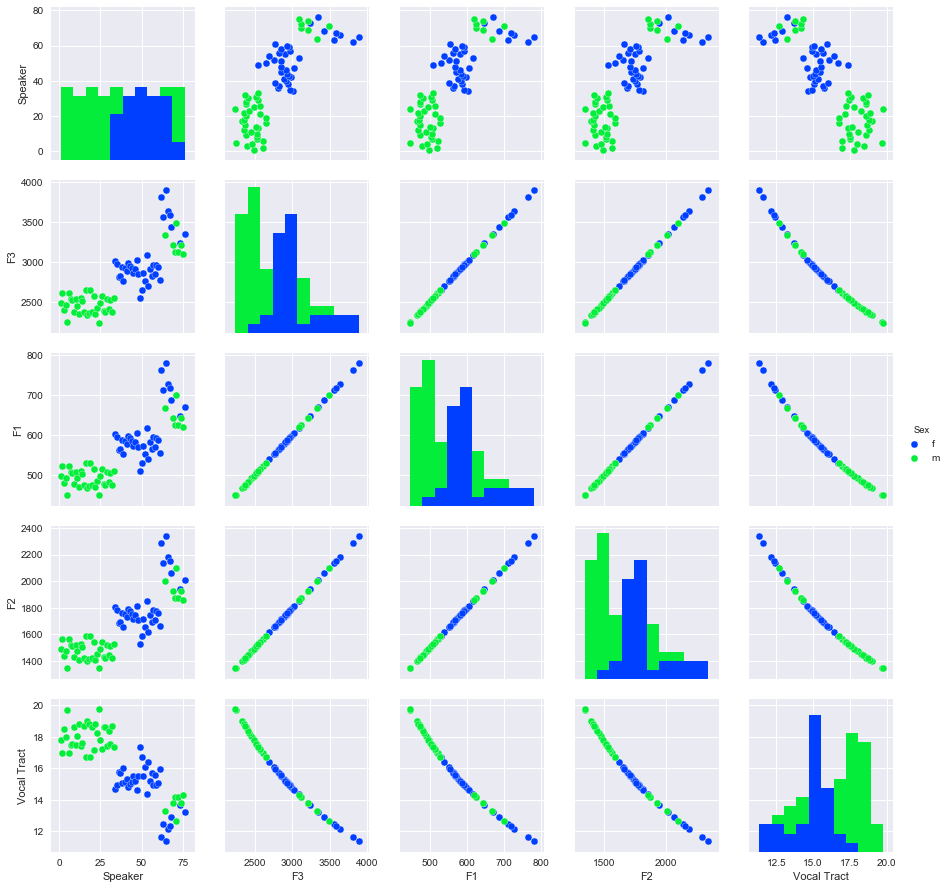

In [65]:
sns.pairplot(final_table, hue='Sex',palette='bright') #Only useful one is bottom right

In [90]:
#Method returns sex as binary classification
def get_sex(sex):
    if sex == 'm':
        return 0
    elif sex == 'f':
        return 1
    else:
        return pd.null 

In [91]:
final_table['binary_sex'] = final_table['Sex'].apply(lambda x: get_sex(x))

In [93]:
from sklearn.model_selection import train_test_split

In [95]:
x = final_table.drop(['Sex','binary_sex'],axis=1)
y= final_table['binary_sex']

In [96]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.3,random_state=101)

In [97]:
gausmix = GaussianMixture(n_components=2) #Instantiate 2-component Gaussian Mixture Model

In [98]:
gausmix.fit(x_train,y_train)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=2, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [99]:
predict = gausmix.predict(x_test)

In [100]:
from sklearn import metrics

In [101]:
metrics.confusion_matrix(y_test,predict)

array([[ 7,  1],
       [ 2, 13]])

In [102]:
print(metrics.classification_report(y_test,predict))

             precision    recall  f1-score   support

          0       0.78      0.88      0.82         8
          1       0.93      0.87      0.90        15

avg / total       0.88      0.87      0.87        23



In [104]:
from sklearn.neighbors import KNeighborsClassifier

In [105]:
knn = KNeighborsClassifier(n_neighbors=1)

In [106]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [109]:
knn_predict = knn.predict(x_test)

In [110]:
metrics.confusion_matrix(y_test,knn_predict)

array([[ 8,  0],
       [ 2, 13]])

In [111]:
print(metrics.classification_report(y_test,knn_predict))

             precision    recall  f1-score   support

          0       0.80      1.00      0.89         8
          1       1.00      0.87      0.93        15

avg / total       0.93      0.91      0.91        23

